# Laboratorio 2


Nombre: Aly Delgado Danner Abel

Carrera: Ing. De Sistemas / Ing. en Diseño y Animación Digital

En los test (pruebas) Se puede verificar a travez de la tabla de prueba la comparación de la Y y Y predicha donde se valida el funcionamiento del modelo

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd
pd.set_option('display.max_rows', 100)

Cargar Datos

In [133]:
data = '/content/drive/Othercomputers/HP corei7/estudio/IA/LAB 2/test_timeseries.csv'

df = pd.read_csv(data)

# Mostrar las primeras filas del dataframe para verificar las columnas
#df.head()
#Nombres de las columnas
print(df.columns)

# Seleccionar columnas específicas por índice
column_indices = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  # Ejemplo de índices de columnas
X = df.iloc[:11000, column_indices]
y = df.iloc[:11000, 5]

#Aqui seleccionaremos los ejemplos que utilizaremos para las pruebas
X_test = df.iloc[11001:11102, column_indices]
y_test = df.iloc[11001:11102, 5]
#X_test = df.iloc[:101, column_indices]
#y_test = df.iloc[:101, 5]

X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

m = y.size  # m = numero de ejemplos de entrenamiento
print("Valores de X")
print(X)
print("Valores de y")
print(y)
#print(y)
# imprimir algunos puntos de datos



Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')
Valores de X
           PS  QV2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  T2M_RANGE     TS  \
0      100.51  9.69   13.55   13.52    17.38    10.92       6.46  14.63   
1      100.48  8.65   11.83   11.74    17.76     9.54       8.23  13.06   
2      100.03  8.59   11.67   11.67    13.74    10.44       3.30  12.12   
3       99.47  7.93   10.38    9.59    18.19     5.44      12.75  11.72   
4      100.39  5.32    4.73    4.71    14.37     3.68      10.69   7.75   
...       ...   ...     ...     ...      ...      ...        ...    ...   
10995  101.71  3.84    0.36    0.16    13.09    -2.42      15.51   4.40   
10996  101.46  5.49    5.28    5.01    10.01     2.03       7.98   6.51   
10997  101.10  8.45   11.57   11.48    16.4

In [134]:
display(df)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,...,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,...,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN
2271945,56043,2020-12-29,0.00,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,...,-10.81,2.70,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5182
2271946,56043,2020-12-30,0.01,82.87,1.57,-6.40,-13.94,-10.17,1.33,-12.16,...,-8.74,2.93,4.10,1.62,2.48,4.42,6.05,2.79,3.26,NaN


Funcion para la Normalización de las caracteristicas de X

In [135]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [136]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X_numpy)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: [99.92484727 10.87351    13.92327182 13.81228727 24.56754364 12.83689364
 11.73057636 18.24512091  1.96669545  2.80539545  1.14403727  1.66135455
  4.00090091  5.67731091  2.23089273  3.44651727]
Desviación estandar calculada: [1.02580647 4.4225281  7.28547705 7.20394674 8.33921452 8.25786305
 3.2646228  8.14324564 0.7533242  1.06154732 0.6290458  0.75013061
 1.30676507 1.50523527 1.36086537 1.21639311]
[[ 0.57043189 -0.26760938 -0.05123506 ... -1.10767463 -0.73548255
  -0.54794561]
 [ 0.54118661 -0.50276899 -0.28732117 ... -1.53285733 -1.22781633
  -0.52328254]
 [ 0.10250737 -0.51633589 -0.30928267 ...  1.20425633 -1.11024409
   2.73224395]
 ...
 [ 1.14558911 -0.547992   -0.32300861 ...  0.09479521  0.66068789
  -0.62193485]
 [ 0.79464572 -0.29474318 -0.07182396 ... -0.06464831 -0.39011407
   0.36458832]
 [ 0.79464572 -0.28795973 -0.06496099 ... -0.40346577 -0.14762131
  -0.33419893]]


Concatenando Unos

In [137]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [138]:
X_ready

array([[ 1.        ,  0.57043189, -0.26760938, ..., -1.10767463,
        -0.73548255, -0.54794561],
       [ 1.        ,  0.54118661, -0.50276899, ..., -1.53285733,
        -1.22781633, -0.52328254],
       [ 1.        ,  0.10250737, -0.51633589, ...,  1.20425633,
        -1.11024409,  2.73224395],
       ...,
       [ 1.        ,  1.14558911, -0.547992  , ...,  0.09479521,
         0.66068789, -0.62193485],
       [ 1.        ,  0.79464572, -0.29474318, ..., -0.06464831,
        -0.39011407,  0.36458832],
       [ 1.        ,  0.79464572, -0.28795973, ..., -0.40346577,
        -0.14762131, -0.33419893]])

#Regresion Lineal Multivariable (DescensoGradiente)

Función para calcular el costo J

In [139]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [140]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [18.29753954 -0.03268624  0.740212    0.86828744  0.82454969  1.99429682
  1.76841781  0.62114574  1.99549976  0.08863007  0.09732112  0.03667975
  0.10674928 -0.20025557 -0.11001761 -0.03091809 -0.10156082]
con un costo de: 0.1885334482336594 


Text(0, 0.5, 'Costo J')

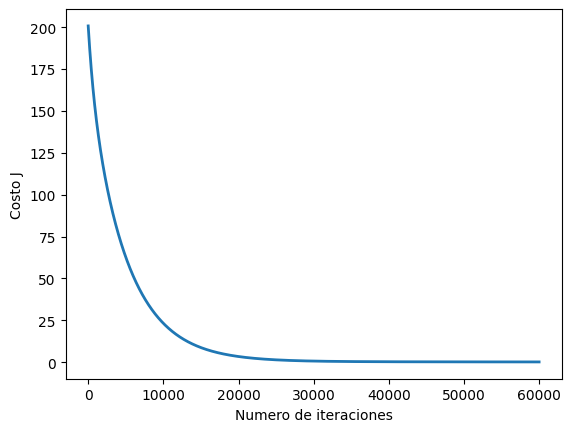

In [141]:
theta = np.zeros(17)

num_ite = 60000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


**PRUEBA CON 100 EJEMPLOS**

**Ahora haremos la prueba para 100 ejemplos del dataset, del ejemplo 11001 al 11102**



In [142]:
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test_norm)

X_test_norm

,PS,QV2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
11001,1.009111,0.146181,0.324856,0.334221,-0.122019,-0.034742,-0.223786,-0.103782,0.309700,0.277524,0.820231,-0.295088,0.290105,-0.224092,-0.118228,-0.145115
11002,1.018860,0.139398,0.320738,0.336998,-0.136409,0.080300,-0.551542,-0.085362,1.172542,1.747077,1.106378,1.544592,1.108921,0.659491,1.145673,-0.465735
11003,1.662256,-0.891687,-0.711453,-0.805432,-1.057359,-0.821870,-0.621994,-0.763224,2.592914,2.218087,1.138173,2.197811,1.935389,1.416848,1.417559,0.175505
11004,2.120432,-1.310000,-1.316766,-1.338473,-1.195262,-1.013203,-0.490279,-1.186888,2.592914,2.067364,2.998133,0.411456,2.011914,1.357056,2.519799,-1.139860
11005,1.749992,-0.742451,-0.531643,-0.561121,-0.907465,-0.645069,-0.686320,-0.787784,2.128306,1.417369,2.282763,0.091511,1.277276,1.303909,1.895196,-0.506840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,0.258482,0.293156,0.441526,0.431390,0.313274,0.329759,-0.033871,0.441455,0.960150,0.418827,0.963305,-0.215102,0.726297,0.539908,1.292639,-0.778134
11098,0.609426,-0.312832,-0.077314,-0.075276,0.144193,-0.006890,0.385779,0.100068,0.535367,0.079699,1.138173,-0.841659,0.443155,0.506691,0.616598,-0.062905
11099,0.706910,-0.398756,-0.159670,-0.161340,0.313274,-0.169159,1.228143,0.183573,-0.553142,-0.476093,-0.833067,0.024856,-1.003165,0.061578,-0.933886,1.120923
11100,0.697161,0.204971,0.386622,0.368925,0.694605,0.522303,0.453168,0.590045,-0.831907,-0.532614,-0.864861,-0.028468,-1.202130,-0.038074,-1.154334,1.244238


In [143]:
# Concatenamos con la columna de ceros
ones_column = np.ones((m_test, 1))

# Concatenar la columna de unos al lado izquierdo de X_test_norm
X_test_ready = np.concatenate([ones_column, X_test_norm], axis=1)
# Mostramos los resultados
print(X_test_ready)

[[ 1.          1.00911113  0.14618109 ... -0.22409182 -0.11822825
  -0.14511532]
 [ 1.          1.01885955  0.13939764 ...  0.65949099  1.14567341
  -0.46573535]
 [ 1.          1.66225577 -0.89168682 ...  1.41684768  1.41755924
   0.17550472]
 ...
 [ 1.          0.70690988 -0.39875609 ...  0.06157781 -0.93388572
   1.12092276]
 [ 1.          0.69716145  0.204971   ... -0.03807439 -1.15433368
   1.24423816]
 [ 1.          0.65816774  0.52153202 ... -0.04471787 -0.94123398
   0.99760736]]


In [144]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(np.dot(i, theta))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [145]:
X_columans = ['Surface Pressure','Specific Humidity at 2 Meters','Dew/Frost Point', 'Wet Bulb Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Temperature Range', 'Earth Skin Temperature', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed', 'Wind Speed Range', 'Wind Speed at 50 Meters','Maximum Wind Speed at 50 Meters', 'Minimum Wind Speed at 50 Meters', 'Wind Speed Range at 50 Meters' ]
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Temperatura "Y"'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(100)

,"Temperatura ""Y""",y_predicha,Surface Pressure,Specific Humidity at 2 Meters,Dew/Frost Point,Wet Bulb Temperature,Maximum Temperature,Minimum Temperature,Temperature Range,Earth Skin Temperature,Wind Speed,Maximum Wind Speed,Minimum Wind Speed,Wind Speed Range,Wind Speed at 50 Meters,Maximum Wind Speed at 50 Meters,Minimum Wind Speed at 50 Meters,Wind Speed Range at 50 Meters
0,17.43,18.317525,100.96,11.52,16.29,16.22,23.55,12.55,11.00,17.40,2.20,3.10,1.66,1.44,4.38,5.34,2.07,3.27
1,17.67,18.477492,100.97,11.49,16.26,16.24,23.43,13.50,9.93,17.55,2.85,4.66,1.84,2.82,5.45,6.67,3.79,2.88
2,12.20,10.946781,101.63,6.93,8.74,8.01,15.75,6.05,9.70,12.03,3.92,5.16,1.86,3.31,6.53,7.81,4.16,3.66
3,8.69,8.233703,102.10,5.08,4.33,4.17,14.60,4.47,10.13,8.58,3.92,5.00,3.03,1.97,6.63,7.72,5.66,2.06
4,11.77,11.831359,101.72,7.59,10.05,9.77,17.00,7.51,9.49,11.83,3.57,4.31,2.58,1.73,5.67,7.64,4.81,2.83
5,15.80,16.367008,100.88,10.76,15.22,14.95,20.98,10.25,10.73,15.79,2.59,3.74,1.62,2.12,4.78,6.51,2.82,3.69
6,17.07,18.058328,100.57,11.28,15.90,15.53,23.70,9.72,13.99,16.93,4.34,6.76,2.16,4.60,7.24,10.04,4.02,6.02
7,9.02,8.136653,101.28,4.79,3.40,3.26,14.83,4.74,10.09,8.21,3.05,4.64,1.70,2.93,4.91,6.89,2.51,4.38
8,9.25,9.020009,100.86,5.71,5.82,5.41,15.71,3.06,12.66,8.39,2.34,3.61,1.22,2.40,4.34,6.64,1.73,4.91
9,14.43,15.210952,100.33,9.77,13.66,13.48,20.22,7.56,12.66,14.24,2.98,4.42,2.11,2.31,5.49,6.64,4.17,2.47


#Ecuacion de la Normal

In [146]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [147]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [148]:
thetaN = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { thetaN }")

los valores de theta calculados son: [ 2.17491951 -0.01900423 -0.01806873  0.02874886  0.01749786 -0.04055084
  0.22069124  0.16380758  0.77750482  0.25768281 -0.1849205   0.00765258
  0.22598155 -0.28420378 -0.68583639  0.81351159  0.73155452]


**PRUEBA CON 100 EJEMPLOS**

**Ahora haremos la prueba para 100 ejemplos del dataset, del ejemplo 11001 al 11102**



In [149]:
# Concatenamos con la columna de ceros
ones_column = np.ones((m_test, 1))

# Concatenar la columna de unos al lado izquierdo de X_test_norm
X_test_readyN = np.concatenate([ones_column, X_test], axis=1)
# Mostramos los resultados
print(X_test_readyN)

[[  1.   100.96  11.52 ...   5.34   2.07   3.27]
 [  1.   100.97  11.49 ...   6.67   3.79   2.88]
 [  1.   101.63   6.93 ...   7.81   4.16   3.66]
 ...
 [  1.   100.65   9.11 ...   5.77   0.96   4.81]
 [  1.   100.64  11.78 ...   5.62   0.66   4.96]
 [  1.   100.6   13.18 ...   5.61   0.95   4.66]]


In [150]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_readyN:
  y_predicha.append(np.dot(i, thetaN))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [151]:
X_columans = ['Surface Pressure','Specific Humidity at 2 Meters','Dew/Frost Point', 'Wet Bulb Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Temperature Range', 'Earth Skin Temperature', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed', 'Wind Speed Range', 'Wind Speed at 50 Meters','Maximum Wind Speed at 50 Meters', 'Minimum Wind Speed at 50 Meters', 'Wind Speed Range at 50 Meters' ]
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Temperatura "Y"'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(100)

,"Temperatura ""Y""",y_predicha,Surface Pressure,Specific Humidity at 2 Meters,Dew/Frost Point,Wet Bulb Temperature,Maximum Temperature,Minimum Temperature,Temperature Range,Earth Skin Temperature,Wind Speed,Maximum Wind Speed,Minimum Wind Speed,Wind Speed Range,Wind Speed at 50 Meters,Maximum Wind Speed at 50 Meters,Minimum Wind Speed at 50 Meters,Wind Speed Range at 50 Meters
0,17.43,17.446144,100.96,11.52,16.29,16.22,23.55,12.55,11.00,17.40,2.20,3.10,1.66,1.44,4.38,5.34,2.07,3.27
1,17.67,17.691781,100.97,11.49,16.26,16.24,23.43,13.50,9.93,17.55,2.85,4.66,1.84,2.82,5.45,6.67,3.79,2.88
2,12.20,11.816173,101.63,6.93,8.74,8.01,15.75,6.05,9.70,12.03,3.92,5.16,1.86,3.31,6.53,7.81,4.16,3.66
3,8.69,8.551492,102.10,5.08,4.33,4.17,14.60,4.47,10.13,8.58,3.92,5.00,3.03,1.97,6.63,7.72,5.66,2.06
4,11.77,11.950667,101.72,7.59,10.05,9.77,17.00,7.51,9.49,11.83,3.57,4.31,2.58,1.73,5.67,7.64,4.81,2.83
5,15.80,15.845813,100.88,10.76,15.22,14.95,20.98,10.25,10.73,15.79,2.59,3.74,1.62,2.12,4.78,6.51,2.82,3.69
6,17.07,17.082754,100.57,11.28,15.90,15.53,23.70,9.72,13.99,16.93,4.34,6.76,2.16,4.60,7.24,10.04,4.02,6.02
7,9.02,8.527558,101.28,4.79,3.40,3.26,14.83,4.74,10.09,8.21,3.05,4.64,1.70,2.93,4.91,6.89,2.51,4.38
8,9.25,8.751309,100.86,5.71,5.82,5.41,15.71,3.06,12.66,8.39,2.34,3.61,1.22,2.40,4.34,6.64,1.73,4.91
9,14.43,14.287996,100.33,9.77,13.66,13.48,20.22,7.56,12.66,14.24,2.98,4.42,2.11,2.31,5.49,6.64,4.17,2.47


#Regresion lineal Multivariable polinomica

Primero elevamos al cuadrado cada una de las columnas y concatenamos para convertir en una ecuacion polinomica

In [152]:
# Concatena la matriz original con la matriz al cuadrado
X_polinomica = np.concatenate((X_numpy, X_numpy * X_numpy), axis=1)
print(X_numpy)
print("--------------POLINOMICA--------------")
print(X_polinomica)


[[100.51   9.69  13.55 ...   4.01   1.23   2.78]
 [100.48   8.65  11.83 ...   3.37   0.56   2.81]
 [100.03   8.59  11.67 ...   7.49   0.72   6.77]
 ...
 [101.1    8.45  11.57 ...   5.82   3.13   2.69]
 [100.74   9.57  13.4  ...   5.58   1.7    3.89]
 [100.74   9.6   13.45 ...   5.07   2.03   3.04]]
--------------POLINOMICA--------------
[[100.51     9.69    13.55   ...  16.0801   1.5129   7.7284]
 [100.48     8.65    11.83   ...  11.3569   0.3136   7.8961]
 [100.03     8.59    11.67   ...  56.1001   0.5184  45.8329]
 ...
 [101.1      8.45    11.57   ...  33.8724   9.7969   7.2361]
 [100.74     9.57    13.4    ...  31.1364   2.89    15.1321]
 [100.74     9.6     13.45   ...  25.7049   4.1209   9.2416]]


Normalizamos los datos

In [153]:
def normalizarCaracteristicasPoli(X):
    X_normPoli = X.copy()
    muPoli = np.zeros(X.shape[1])
    sigmaPoli = np.zeros(X.shape[1])

    muPoli = np.mean(X, axis = 0)
    sigmaPoli = np.std(X, axis = 0)
    X_normPoli = (X - muPoli) / sigmaPoli

    return X_normPoli, muPoli, sigmaPoli

In [154]:
X_normPoli, muPoli, sigmaPoli = normalizarCaracteristicasPoli(X_polinomica)
print('Media calculada:', muPoli)
print('Desviación estandar calculada:', sigmaPoli)
print(X_normPoli)

Media calculada: [9.99248473e+01 1.08735100e+01 1.39232718e+01 1.38122873e+01
 2.45675436e+01 1.28368936e+01 1.17305764e+01 1.82451209e+01
 1.96669545e+00 2.80539545e+00 1.14403727e+00 1.66135455e+00
 4.00090091e+00 5.67731091e+00 2.23089273e+00 3.44651727e+00
 9.98602738e+03 1.37791975e+02 2.46935674e+02 2.42676128e+02
 6.73106699e+02 2.32978140e+02 1.48264184e+02 3.99196887e+02
 4.43538835e+00 8.99712637e+00 1.70451990e+00 3.32279485e+00
 1.77148430e+01 3.44975924e+01 6.82883691e+00 1.33580935e+01]
Desviación estandar calculada: [  1.02580647   4.4225281    7.28547705   7.20394674   8.33921452
   8.25786305   3.2646228    8.14324564   0.7533242    1.06154732
   0.6290458    0.75013061   1.30676507   1.50523527   1.36086537
   1.21639311 204.83711082  96.12350681 176.52550544 175.0137017
 399.21015724 197.43244282  75.68336317 280.30042974   3.89711885
   7.82707545   1.94486492   3.66118878  11.93774627  20.59561351
   7.47027984  10.14212231]
[[ 0.57043189 -0.26760938 -0.05123506 ..

Concadenamos con 1 en como primera columna de la matriz

In [155]:
X_norm_polinomica_ready = np.concatenate([np.ones((m, 1)), X_normPoli], axis=1)
print(X_norm_polinomica_ready)

[[ 1.          0.57043189 -0.26760938 ... -0.89424344 -0.71161148
  -0.55508042]
 [ 1.          0.54118661 -0.50276899 ... -1.12357383 -0.87215433
  -0.53854542]
 [ 1.          0.10250737 -0.51633589 ...  1.04888877 -0.84473902
   3.20197346]
 ...
 [ 1.          1.14558911 -0.547992   ... -0.03035561  0.39731619
  -0.60362056]
 [ 1.          0.79464572 -0.29474318 ... -0.16319943 -0.52726765
   0.17491472]
 [ 1.          0.79464572 -0.28795973 ... -0.42692063 -0.36249471
  -0.40588088]]


In [156]:
def calcularCostoPolinomial(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Calculamos con la formula de descenso por el gradiente

In [157]:
def calcularDescensoGradientePolinomico(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historicoPolinomial = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historicoPolinomial.append(calcularCosto(X, y, theta))

  return theta, J_historicoPolinomial

los valores de theta calculados son: [ 1.82975395e+01 -1.82770386e-02  3.34137935e-01  9.57823746e-01
  8.87723733e-01  1.35442090e+00  1.31065700e+00  1.44507468e-01
  1.46957053e+00  2.33325223e-03  3.24230947e-02 -1.55333854e-02
  5.84240538e-02 -7.99957510e-02 -2.25480070e-02 -3.44861256e-02
  1.10114814e-02 -1.82927812e-02 -2.25852004e-01  1.19731137e-03
 -1.98345298e-02  1.02526844e+00  3.00687853e-01  1.70492228e-01
  8.49401423e-01 -7.34739564e-03  2.73039428e-02  4.46923202e-02
  3.30785411e-02 -1.55509790e-02 -1.67427464e-02  7.31547665e-02
 -2.86115276e-02]
con un costo de: 0.15706682855513748 


Text(0, 0.5, 'Costo J')

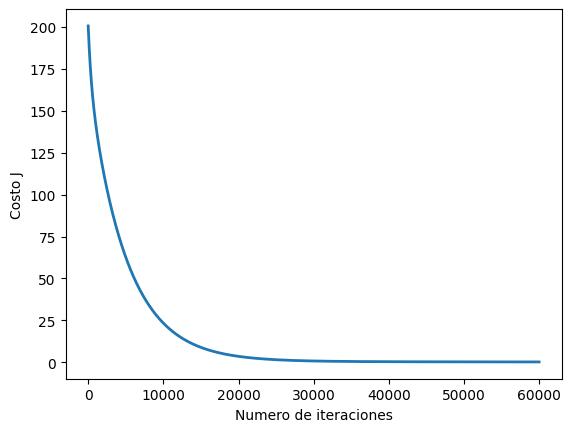

In [158]:
thetaPoli = np.zeros(33)

num_ite = 60000
alpha = 0.0001

thetaPoli, J_historicoPolinomial = calcularDescensoGradientePolinomico(X_norm_polinomica_ready, y, thetaPoli, alpha, num_ite)
print(f"los valores de theta calculados son: { thetaPoli }")
print(f"con un costo de: { J_historicoPolinomial[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historicoPolinomial)), J_historicoPolinomial, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


**PRUEBA CON 100 EJEMPLOS**

**Ahora haremos la prueba para 100 ejemplos del dataset, del ejemplo 11001 al 11102**



In [159]:
#Añadimos las X al cuadrado

X_test_cuadrado = X_test * X_test
X_test_polinomica_ready = np.concatenate((X_test, X_test_cuadrado), axis=1)

print(X_test_polinomica_ready.shape[1])

32


In [160]:
X_test_norm_Poli = (X_test_polinomica_ready - muPoli) / sigmaPoli
m_test = len(X_test_norm_Poli)

print(X_test_norm_Poli.shape[1])

32


In [161]:
# Concatenamos con la columna de ceros
ones_column = np.ones((m_test, 1))

# Concatenar la columna de unos al lado izquierdo de X_test_norm
X_test_ready_Poli = np.concatenate([ones_column, X_test_norm_Poli], axis=1)
# Mostramos los resultados
print(X_test_ready_Poli)

print(X_test_ready_Poli.shape[1])

[[ 1.          1.00911113  0.14618109 ... -0.29044983 -0.34054105
  -0.2627846 ]
 [ 1.          1.01885955  0.13939764 ...  0.48511823  1.0086989
  -0.49927356]
 [ 1.          1.66225577 -0.89168682 ...  1.28660929  1.40245925
   0.00369809]
 ...
 [ 1.          0.70690988 -0.39875609 ... -0.05849267 -0.79076514
   0.96409866]
 [ 1.          0.69716145  0.204971   ... -0.14144722 -0.85582295
   1.10859504]
 [ 1.          0.65816774  0.52153202 ... -0.14689984 -0.79332194
   0.82403921]]
33


In [162]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready_Poli:
  y_predicha.append(np.dot(i, thetaPoli))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [163]:
X_columans = ['Surface Pressure','Specific Humidity at 2 Meters','Dew/Frost Point', 'Wet Bulb Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Temperature Range', 'Earth Skin Temperature', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed', 'Wind Speed Range', 'Wind Speed at 50 Meters','Maximum Wind Speed at 50 Meters', 'Minimum Wind Speed at 50 Meters', 'Wind Speed Range at 50 Meters' ]
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Temperatura "Y"'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(100)

,"Temperatura ""Y""",y_predicha,Surface Pressure,Specific Humidity at 2 Meters,Dew/Frost Point,Wet Bulb Temperature,Maximum Temperature,Minimum Temperature,Temperature Range,Earth Skin Temperature,Wind Speed,Maximum Wind Speed,Minimum Wind Speed,Wind Speed Range,Wind Speed at 50 Meters,Maximum Wind Speed at 50 Meters,Minimum Wind Speed at 50 Meters,Wind Speed Range at 50 Meters
0,17.43,17.722325,100.96,11.52,16.29,16.22,23.55,12.55,11.00,17.40,2.20,3.10,1.66,1.44,4.38,5.34,2.07,3.27
1,17.67,18.021978,100.97,11.49,16.26,16.24,23.43,13.50,9.93,17.55,2.85,4.66,1.84,2.82,5.45,6.67,3.79,2.88
2,12.20,10.921118,101.63,6.93,8.74,8.01,15.75,6.05,9.70,12.03,3.92,5.16,1.86,3.31,6.53,7.81,4.16,3.66
3,8.69,8.452174,102.10,5.08,4.33,4.17,14.60,4.47,10.13,8.58,3.92,5.00,3.03,1.97,6.63,7.72,5.66,2.06
4,11.77,11.761859,101.72,7.59,10.05,9.77,17.00,7.51,9.49,11.83,3.57,4.31,2.58,1.73,5.67,7.64,4.81,2.83
5,15.80,15.840479,100.88,10.76,15.22,14.95,20.98,10.25,10.73,15.79,2.59,3.74,1.62,2.12,4.78,6.51,2.82,3.69
6,17.07,17.601673,100.57,11.28,15.90,15.53,23.70,9.72,13.99,16.93,4.34,6.76,2.16,4.60,7.24,10.04,4.02,6.02
7,9.02,8.196279,101.28,4.79,3.40,3.26,14.83,4.74,10.09,8.21,3.05,4.64,1.70,2.93,4.91,6.89,2.51,4.38
8,9.25,8.934948,100.86,5.71,5.82,5.41,15.71,3.06,12.66,8.39,2.34,3.61,1.22,2.40,4.34,6.64,1.73,4.91
9,14.43,14.615496,100.33,9.77,13.66,13.48,20.22,7.56,12.66,14.24,2.98,4.42,2.11,2.31,5.49,6.64,4.17,2.47


#Regresion Lineal polinomica (con solo una variable elevada al cuadrado)

In [164]:
data = '/content/drive/Othercomputers/HP corei7/estudio/IA/LAB 2/test_timeseries.csv'

df = pd.read_csv(data)

# Mostrar las primeras filas del dataframe para verificar las columnas
#df.head()
print(df.columns)

# Seleccionar columnas específicas por índice
XP = df.iloc[:11000, 4]
yP = df.iloc[:11000, 5]

X_numpyP = XP.to_numpy()
y_numpyP = yP.to_numpy()

m = y.size  # m = numero de ejemplos de entrenamiento
print("Valores de X")
print(XP)
print("Valores de y")
print(yP)
#print(y)
# imprimir algunos puntos de datos



Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')
Valores de X
0        9.69
1        8.65
2        8.59
3        7.93
4        5.32
         ... 
10995    3.84
10996    5.49
10997    8.45
10998    9.57
10999    9.60
Name: QV2M, Length: 11000, dtype: float64
Valores de y
0        14.71
1        13.05
2        12.12
3        11.80
4         7.91
         ...  
10995     4.57
10996     6.60
10997    12.16
10998    14.91
10999    14.28
Name: T2M, Length: 11000, dtype: float64


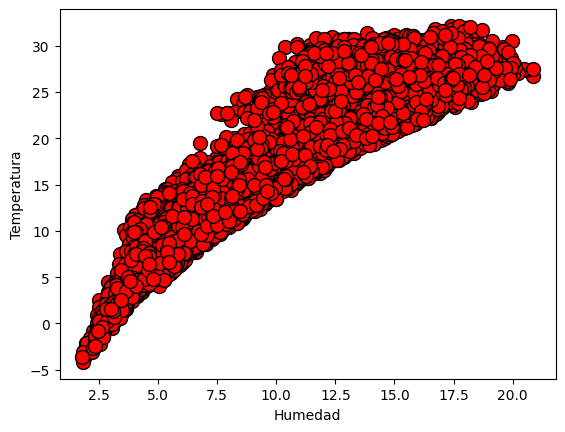

In [165]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Temperatura')
    pyplot.xlabel('Humedad')

plotData(XP, yP)

In [166]:
X_cuadrado = X_numpyP * X_numpyP
X_numpyP = np.stack([X_numpyP, X_cuadrado], axis=1)

print(X_numpyP)

[[ 9.69   93.8961]
 [ 8.65   74.8225]
 [ 8.59   73.7881]
 ...
 [ 8.45   71.4025]
 [ 9.57   91.5849]
 [ 9.6    92.16  ]]


Normalizamos Utilizando el codigo de arriba

In [167]:
X_normP, muP, sigmaP = normalizarCaracteristicas(X_numpyP)
print('Media calculada:', muP)
print('Desviación estandar calculada:', sigmaP)
print(X_normP)

Media calculada: [ 10.87351    137.79197454]
Desviación estandar calculada: [ 4.4225281  96.12350681]
[[-0.26760938 -0.45666119]
 [-0.50276899 -0.65508923]
 [-0.51633589 -0.66585039]
 ...
 [-0.547992   -0.69066846]
 [-0.29474318 -0.48070525]
 [-0.28795973 -0.47472232]]


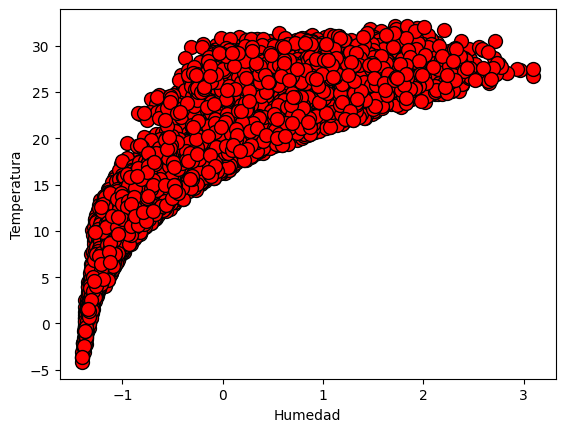

In [168]:
plotData(X_normP[:, 1], y_numpy)

Concatenamos con unos a la matris X

In [169]:
X_normP = np.concatenate([np.ones((m, 1)), X_normP], axis=1)

In [170]:
print(X_normP)

[[ 1.         -0.26760938 -0.45666119]
 [ 1.         -0.50276899 -0.65508923]
 [ 1.         -0.51633589 -0.66585039]
 ...
 [ 1.         -0.547992   -0.69066846]
 [ 1.         -0.29474318 -0.48070525]
 [ 1.         -0.28795973 -0.47472232]]


Aplicando el descenso por el Gradiente

los valores de theta calculados son: [18.29753954  4.76597294  2.59352557]
con un costo de: 5.355456692111903 


Text(0, 0.5, 'Costo J')

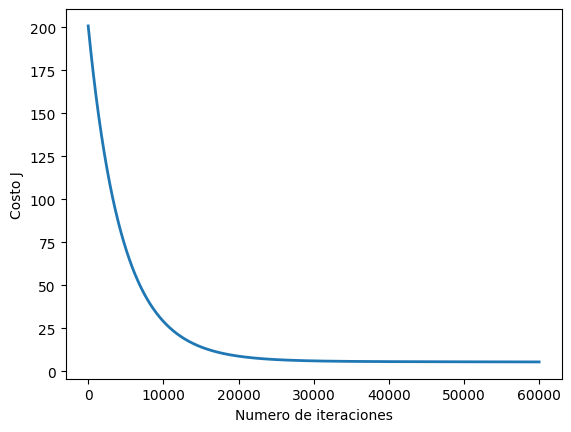

In [171]:
thetaP = np.zeros(3)

num_ite = 60000
alpha = 0.0001

thetaP, J_historico = calcularDescensoGradiente(X_normP, y_numpyP, thetaP, alpha, num_ite)
print(f"los valores de theta calculados son: { thetaP }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


Grafico de la regresion lineal

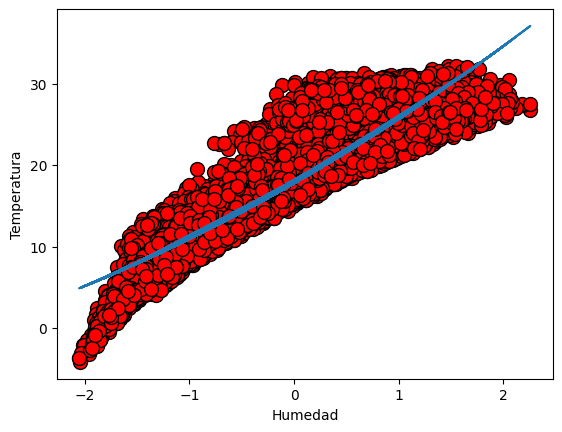

In [172]:
plotData(X_normP[:, 1], y_numpyP)
pyplot.plot(X_normP[:, 1], np.dot(X_normP, thetaP), '-')

Prueba de pronostico

In [173]:
X_arrayP = [1, 9.69, 93.8961]
X_arrayP[1:] = (X_arrayP[1:] - muP) / sigmaP
print(X_arrayP)

[1, -0.2676093792067459, -0.4566611851052032]


In [174]:
print(np.dot(X_arrayP, thetaP))

15.837758020593139


El valor de la temperatura registrado era: **14.71**
y nuestra predicción es: **15.837758**, por lo que podemos deducir que nuestro modelo tiene un costo minimo y si funciona

**PRUEBA CON 100 EJEMPLOS**

In [175]:
X_testP = df.iloc[11001:11102, 4]
y_testP = df.iloc[11001:11102, 5]

In [176]:
#Añadimos la X al cuadrado

X_test_cuadradoP = X_testP * X_testP
X_test_polinomica_readyP = np.concatenate((X_testP.values.reshape(-1,1), X_test_cuadradoP.values.reshape(-1,1)), axis=1)


**Ahora haremos la prueba para 100 ejemplos del dataset, del ejemplo 11001 al 11102**



In [177]:
X_test_norm = (X_test_polinomica_readyP - muP) / sigmaP
m_test = len(X_test_norm)


In [178]:
# Concatenamos con la columna de ceros
ones_column = np.ones((m_test, 1))

# Concatenar la columna de unos al lado izquierdo de X_test_norm
X_test_readyP = np.concatenate([ones_column, X_test_norm], axis=1)
# Mostramos los resultados
print(X_test_readyP)

[[ 1.00000000e+00  1.46181095e-01 -5.28650556e-02]
 [ 1.00000000e+00  1.39397644e-01 -6.00464416e-02]
 [ 1.00000000e+00 -8.91686815e-01 -9.33872239e-01]
 [ 1.00000000e+00 -1.30999959e+00 -1.16501757e+00]
 [ 1.00000000e+00 -7.42450907e-01 -8.34175502e-01]
 [ 1.00000000e+00 -2.56663151e-02 -2.29021758e-01]
 [ 1.00000000e+00  9.19134917e-02 -1.09791818e-01]
 [ 1.00000000e+00 -1.37557294e+00 -1.19479489e+00]
 [ 1.00000000e+00 -1.16754713e+00 -1.09429918e+00]
 [ 1.00000000e+00 -2.49520178e-01 -4.40465355e-01]
 [ 1.00000000e+00  2.18537899e-01  2.49015620e-02]
 [ 1.00000000e+00  5.44143518e-01  4.01217421e-01]
 [ 1.00000000e+00 -5.61558896e-01 -7.01179938e-01]
 [ 1.00000000e+00 -6.65571802e-01 -7.79279461e-01]
 [ 1.00000000e+00  1.34875344e-01 -6.48236289e-02]
 [ 1.00000000e+00  6.45895274e-01  5.27664118e-01]
 [ 1.00000000e+00  5.35098917e-01  3.90181619e-01]
 [ 1.00000000e+00  5.96149971e-01  4.65319327e-01]
 [ 1.00000000e+00 -3.89711486e-01 -5.62500020e-01]
 [ 1.00000000e+00 -1.23312049e+

In [179]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_readyP:
  y_predicha.append(np.dot(i, thetaP))

# Convertimos la lista de y_predichas a un array unidimensional
y_predicha = np.array(y_predicha)
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha, columns = ['y_predicha'])
df_pred['y_predicha'] = df_pred['y_predicha'].abs()

In [180]:
X_columans = ['Surface Pressure','Specific Humidity at 2 Meters','Dew/Frost Point', 'Wet Bulb Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Temperature Range', 'Earth Skin Temperature', 'Wind Speed', 'Maximum Wind Speed', 'Minimum Wind Speed', 'Wind Speed Range', 'Wind Speed at 50 Meters','Maximum Wind Speed at 50 Meters', 'Minimum Wind Speed at 50 Meters', 'Wind Speed Range at 50 Meters' ]
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Temperatura "Y"'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(100)

,"Temperatura ""Y""",y_predicha,Surface Pressure,Specific Humidity at 2 Meters,Dew/Frost Point,Wet Bulb Temperature,Maximum Temperature,Minimum Temperature,Temperature Range,Earth Skin Temperature,Wind Speed,Maximum Wind Speed,Minimum Wind Speed,Wind Speed Range,Wind Speed at 50 Meters,Maximum Wind Speed at 50 Meters,Minimum Wind Speed at 50 Meters,Wind Speed Range at 50 Meters
0,17.43,18.857128,100.96,11.52,16.29,16.22,23.55,12.55,11.00,17.40,2.20,3.10,1.66,1.44,4.38,5.34,2.07,3.27
1,17.67,18.806173,100.97,11.49,16.26,16.24,23.43,13.50,9.93,17.55,2.85,4.66,1.84,2.82,5.45,6.67,3.79,2.88
2,12.20,11.625763,101.63,6.93,8.74,8.01,15.75,6.05,9.70,12.03,3.92,5.16,1.86,3.31,6.53,7.81,4.16,3.66
3,8.69,9.032614,102.10,5.08,4.33,4.17,14.60,4.47,10.13,8.58,3.92,5.00,3.03,1.97,6.63,7.72,5.66,2.06
4,11.77,12.595583,101.72,7.59,10.05,9.77,17.00,7.51,9.49,11.83,3.57,4.31,2.58,1.73,5.67,7.64,4.81,2.83
5,15.80,17.581241,100.88,10.76,15.22,14.95,20.98,10.25,10.73,15.79,2.59,3.74,1.62,2.12,4.78,6.51,2.82,3.69
6,17.07,18.450849,100.57,11.28,15.90,15.53,23.70,9.72,13.99,16.93,4.34,6.76,2.16,4.60,7.24,10.04,4.02,6.02
7,9.02,8.642865,101.28,4.79,3.40,3.26,14.83,4.74,10.09,8.21,3.05,4.64,1.70,2.93,4.91,6.89,2.51,4.38
8,9.25,9.894949,100.86,5.71,5.82,5.41,15.71,3.06,12.66,8.39,2.34,3.61,1.22,2.40,4.34,6.64,1.73,4.91
9,14.43,15.965975,100.33,9.77,13.66,13.48,20.22,7.56,12.66,14.24,2.98,4.42,2.11,2.31,5.49,6.64,4.17,2.47
